In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [10]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

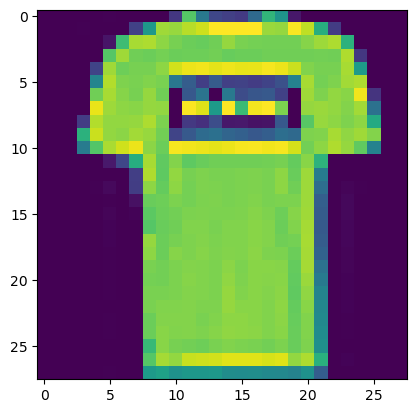

In [11]:
plt.imshow(x_train[1])

In [12]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [13]:
len(x_train)

60000

In [14]:
len(x_test)

10000

In [15]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [16]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [17]:
#scaling the image
x_train=x_train/255
x_test=x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [20]:
#build cnn model
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='sigmoid')

])

c:\Users\sasan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Train the model
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9096 - loss: 0.2457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9191 - loss: 0.2192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9265 - loss: 0.1968
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9336 - loss: 0.1789
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9389 - loss: 0.1627


In [24]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9012 - loss: 0.2845


[0.2845287024974823, 0.901199996471405]

In [25]:
# creation of model using only data augmented images
generator=ImageDataGenerator(
    rotation_range=70,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_train_augmented=x_train.reshape(x_train.shape[0],28,28,1)
x_train_augmented.shape

(60000, 28, 28, 1)

In [28]:
x_test_augmented=x_test.reshape(x_test.shape[0],28,28,1)
x_test_augmented.shape

(10000, 28, 28, 1)

In [29]:
generator.fit(x_train_augmented)
generator.fit(x_test_augmented)

In [30]:
x_train_augment_img=generator.flow(x_train_augmented,y_train)
x_test_augment_img=generator.flow(x_test_augmented,y_test)


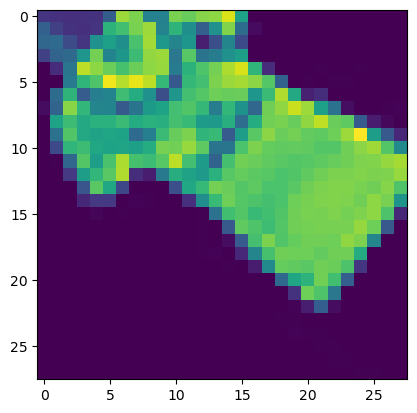

In [31]:
plt.imshow(x_train_augment_img[0][0][4])

In [32]:
#model creation using augmented images
model2=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

In [33]:
# Compile the model
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model2.fit(x_train_augment_img,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.5905 - loss: 1.1305
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7080 - loss: 0.7974
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7404 - loss: 0.7105
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7593 - loss: 0.6564
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7722 - loss: 0.6200


In [35]:
model2.evaluate(x_test_augment_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7811 - loss: 0.6103


[0.6102654337882996, 0.7810999751091003]

In [36]:
#lets create a model3 that trains both original and augmented images
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    shear_range=10
)

In [37]:
augment_train=datagen.flow(x_train_augmented,y_train)

In [38]:
augmented_imgs,augmented_labels=next(augment_train)

In [39]:
augmented_imgs.shape

(32, 28, 28, 1)

In [40]:
import numpy as np
x_combined=np.concatenate([x_train_augmented,augmented_imgs])
y_combined=np.concatenate([y_train,augmented_labels])

In [41]:
#shuffle the combined dataset
indices=np.arange(len(x_combined))
np.random.shuffle(indices)

x_combined=x_combined[indices]
y_combined=y_combined[indices]

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
model3=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

In [43]:
# Compile the model
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
model3.fit(x_combined,y_combined,epochs=10)

Epoch 1/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8380 - loss: 0.4470
Epoch 2/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8905 - loss: 0.2971
Epoch 3/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9070 - loss: 0.2496
Epoch 4/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9188 - loss: 0.2173
Epoch 5/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9279 - loss: 0.1895
Epoch 6/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9368 - loss: 0.1673
Epoch 7/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9444 - loss: 0.1477
Epoch 8/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9503 - loss: 0.1313
Epoch 9/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9566 - loss: 0.1161
Epoch 10/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9627 - loss: 0.1008


In [45]:
model3.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9075 - loss: 0.2934


[0.29337480664253235, 0.9075000286102295]